### Regresion No Lineal

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("csv/china_gdp.csv")
df.head()
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


### Se grafica los datos de prueba

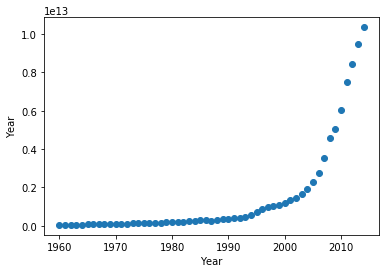

In [9]:
cdf=df[['Year','Value']]
cdf.head(9)
plt.scatter(cdf.Year,cdf.Value)
plt.xlabel('Year')
plt.ylabel('Year')
plt.show()

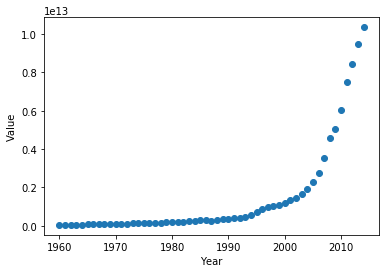

In [10]:
x_data,y_data = (df["Year"].values,df["Value"].values)
plt.scatter(x_data,y_data)
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

<!-- # Se selecciona el conjunto de datos de Entrenamiento y de **Prueba**  -->

# Se selecciona el conjunto de datos de train y de test 

In [11]:
msk=np.random.rand(len(df))<0.8
msk=np.random.rand(len(df))<0.8
print(msk)
train=df[msk]
test=df[~msk]
print('train ,test',len(train),len(test))


[ True False  True  True  True  True  True False  True  True  True  True
 False  True  True  True False  True  True  True  True  True  True  True
  True False  True  True  True  True  True False  True  True  True False
  True  True False  True  True False  True  True  True  True  True  True
  True False  True False  True  True  True]
train ,test 44 11


### Grafica de los datos de train

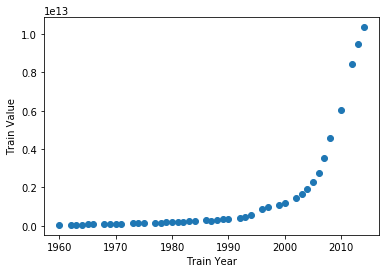

In [12]:
plt.scatter(train.Year,train.Value)
plt.xlabel('Train Year')
plt.ylabel('Train Value')
plt.show()

### Aplicamos Regresion


In [13]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=train[['Year']]
train_y=train[['Value']]
regr.fit(train_x,train_y)
print(regr.coef_)
print(regr.intercept_)


[[1.14497375e+11]]
[-2.26066464e+14]


# Se genera el modelo (FUNCION ESPERADA)

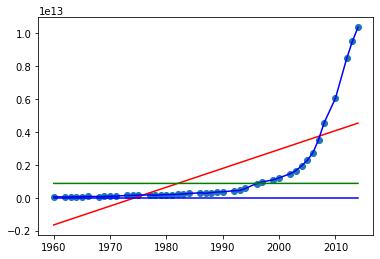

In [14]:
Ey=regr.intercept_[0]+regr.coef_[0][0]*train_x
plt.scatter(train_x,train_y)
plt.plot(train_x,Ey,'-r')
plt.plot(train_x,train_y,'-b')
plt.plot(train_x,np.log(train_y),'-b')
EyLog=regr.coef_[0][0]*np.log(train_x,)
plt.plot(train_x,EyLog,'-g')
plt.show()

# Se genera funcion esperada por Coeficientes

Coef [[ 6.41761629e+08  8.50210740e+11 -5.72579997e+08  1.08450154e+05]]
intercept [-5.55405432e+17]
Coef intercept (1,)
Coef shape (1, 4)
Train New X shape (44, 4)
Train X shape (44, 1)
Train New Col 0 X shape (44,)
EyPOl (44, 1)


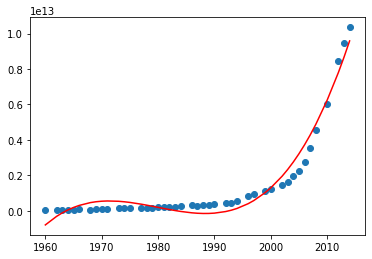

In [15]:
train_new_x=np.hstack([train_x,train_x**2,train_x**3,train_x**4])
regr.fit(train_new_x,train_y)
print('Coef',regr.coef_)
print('intercept',regr.intercept_)
print('Coef intercept',regr.intercept_.shape)
print('Coef shape',regr.coef_.shape)
print('Train New X shape',train_new_x.shape)
print('Train X shape',train_x.shape)
print('Train New Col 0 X shape',np.array(train_new_x[:,0]).shape)
EyPol=regr.intercept_[0]+regr.coef_[0][0]*train_x+regr.coef_[0][1]*train_x**2+regr.coef_[0][2]*train_x**3+regr.coef_[0][3]*train_x**4
print('EyPOl',EyPol.shape)
plt.scatter(train_x,train_y)
plt.plot(train_x,EyPol,'-r')
plt.show()

# Se genera funcion esperada por Transpuesta Datos Entrenamiento


Coef [[ 6.41761629e+08  8.50210740e+11 -5.72579997e+08  1.08450154e+05]]
intercept [-5.55405432e+17]
Coef intercept (1,)
Coef shape (1, 4)
Train New X shape (44, 4)
Train X shape (44, 1)
Train New Col 0 X shape (44,)
X1 shape (44, 1)
EyPOl (44, 1)


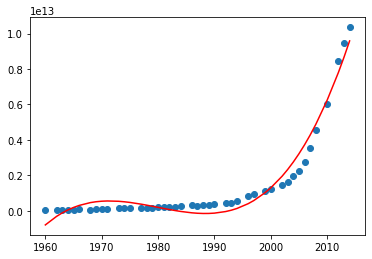

In [16]:
train_new_xhttp://localhost:8888/notebooks/UNIR/AprendizajeAutomatico/FormasRegresionNoLineal.ipynb#Se-genera-funcion-esperada-por-Transpuesta-Datos-Entrenamiento=np.hstack([train_x,train_x**2,train_x**3,train_x**4])
regr.fit(train_new_x,train_y)
print('Coef',regr.coef_)
print('intercept',regr.intercept_)
print('Coef intercept',regr.intercept_.shape)
print('Coef shape',regr.coef_.shape)
print('Train New X shape',train_new_x.shape)
print('Train X shape',train_x.shape)
print('Train New Col 0 X shape',np.array(train_new_x[:,0]).shape)
X1=train_new_x[:,0][:,np.newaxis]
X2=train_new_x[:,1][:,np.newaxis]
X3=train_new_x[:,2][:,np.newaxis]
X4=train_new_x[:,3][:,np.newaxis]
print('X1 shape',X1.shape)
EyPol=regr.intercept_[0]+regr.coef_[0][0]*X1+regr.coef_[0][1]*X2+regr.coef_[0][2]*X3+regr.coef_[0][3]*X4
print('EyPOl',EyPol.shape)
plt.scatter(train_x,train_y)
plt.plot(train_x,EyPol,'-r')
plt.show()

# Se genera funcion esperada por producto Coeficientes Train Data

Coef [[ 6.41761629e+08  8.50210740e+11 -5.72579997e+08  1.08450154e+05]]
intercept [-5.55405432e+17]
Coef intercept (1,)
Coef shape (1, 4)
Train New X shape (44, 4)
Train X shape (44, 1)
Train New Col 0 X shape (44,)
(4, 1)
(44, 4)
EyPOl (44, 1)


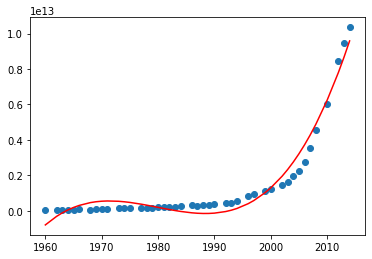

In [17]:
train_new_x=np.hstack([train_x,train_x**2,train_x**3,train_x**4])
regr.fit(train_new_x,train_y)
print('Coef',regr.coef_)
print('intercept',regr.intercept_)
print('Coef intercept',regr.intercept_.shape)
print('Coef shape',regr.coef_.shape)
print('Train New X shape',train_new_x.shape)
print('Train X shape',train_x.shape)
print('Train New Col 0 X shape',np.array(train_new_x[:,0]).shape)
print(regr.coef_[0][:,np.newaxis].shape)
print(train_new_x.shape)
EyPol=regr.intercept_[0]+train_new_x.dot(regr.coef_[0][:,np.newaxis])
print('EyPOl',EyPol.shape)
plt.scatter(train_x,train_y)
plt.plot(train_x,EyPol,'-r')
plt.show()